## Test the segmentation of the images using OpenCV
#### Segmentation is done on a preprocessed image, where a proper threshold has been applied

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv2 import cvtColor, COLOR_BGR2RGB

dataset_path = '../dataset/'
test_pictures_path = dataset_path + 'tif_merged_processed/'

In [101]:
picture = '1w_D Merged_Processed.tif'
picture_path = test_pictures_path + picture

______________________________

In [102]:
img = cv2.imread(picture_path, cv2.IMREAD_GRAYSCALE)
assert img is not None, 'No image found.'   # asert check if true, otherwise raise an AssertionError with an optional error message

Here one should use the most appropriate threshold

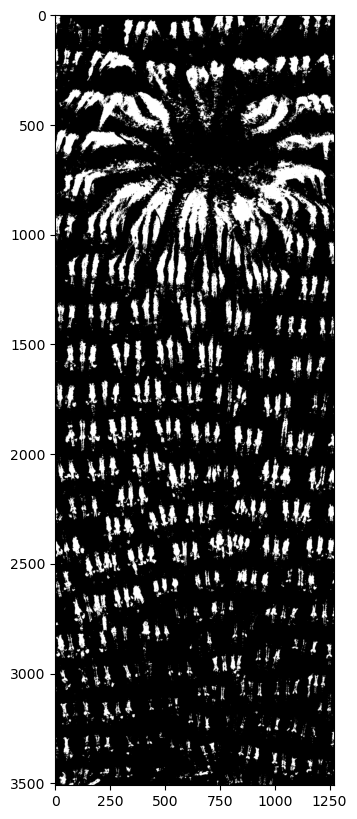

In [103]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10, 10))
plt.imshow(thresh, cmap='gray')

Noise removal

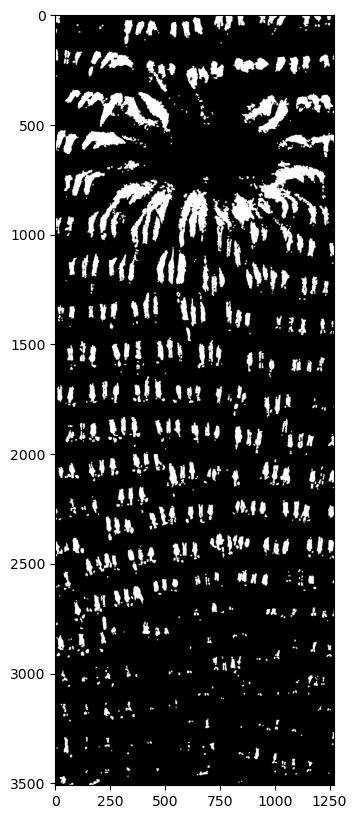

In [104]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.figure(figsize=(10, 10))
plt.imshow(opening, cmap='gray')

Sure background area

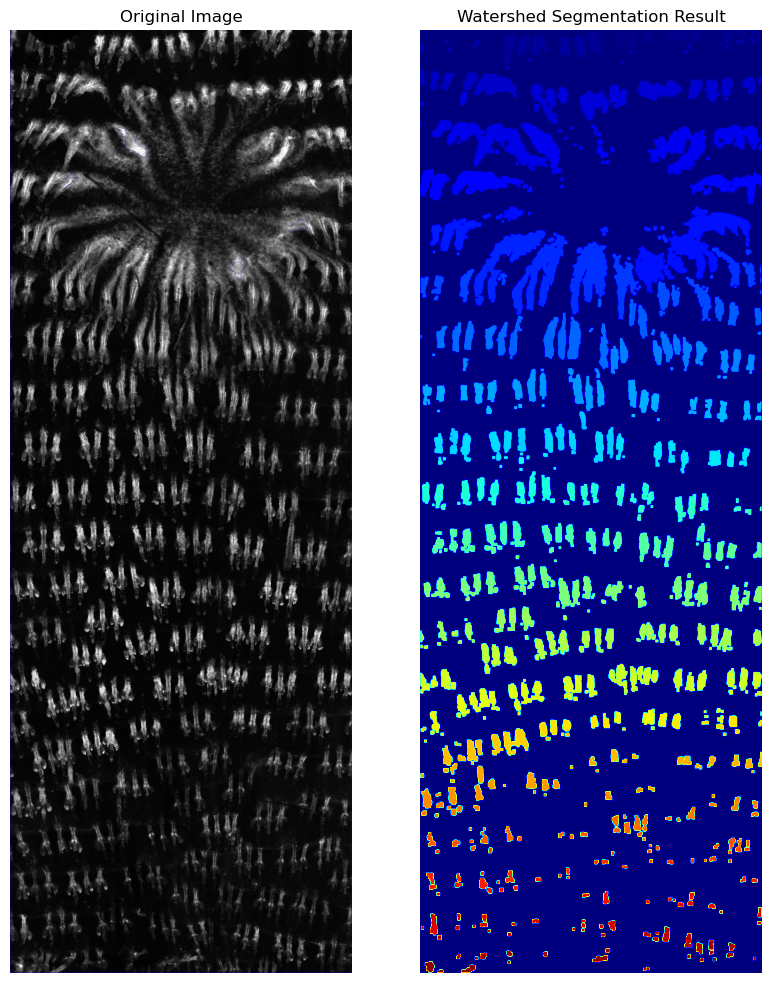

In [159]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

ret, sure_fg = cv2.threshold(sure_bg, 0.7 * sure_bg.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(img, markers)

plt.figure(figsize=(15, 22))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(markers, cmap='jet')
plt.title('Watershed Segmentation Result')
plt.axis('off')

plt.show()

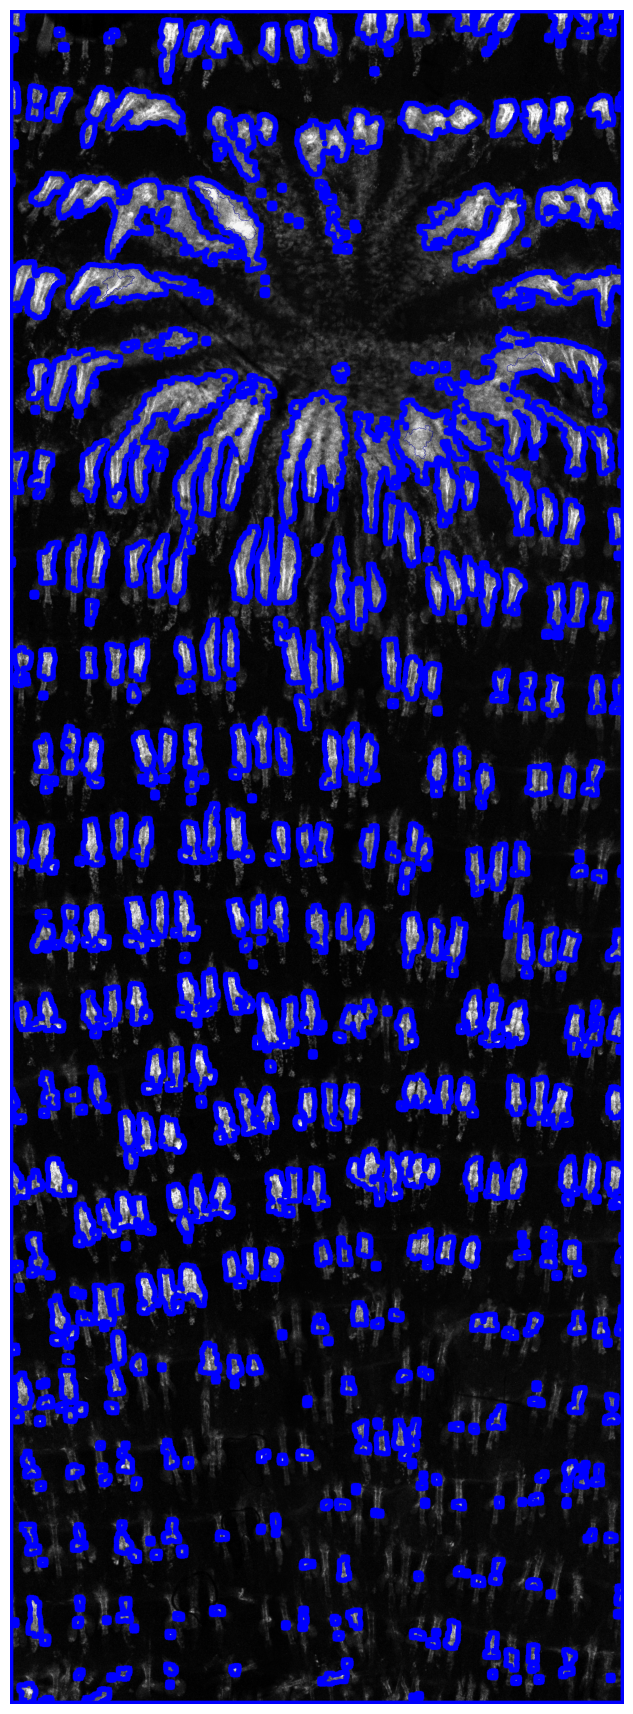

In [160]:
# draw contours
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255, 0, 0), 10)

plt.figure(figsize=(15, 22))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()